Accuracy: 1.0
Precision: 1.0
Recall: 1.0
f1 Score: 1.0


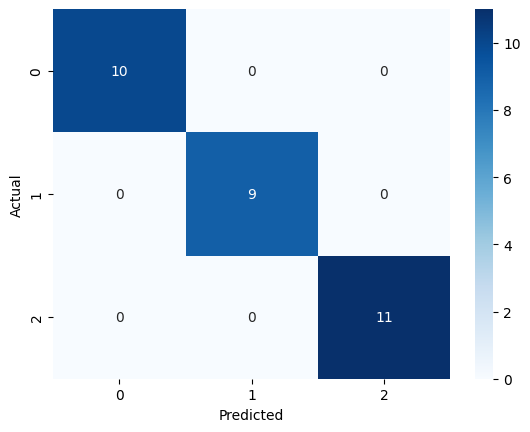

In [17]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

def load_data():
    iris = load_iris()
    X = pd.DataFrame(iris.data, columns=iris.feature_names)
    y = iris.target
    
    return X, y

def pre_process(X, y , test_size=0.2, random_state = 42):
    return train_test_split (X, y, test_size = test_size, random_state = random_state)

def build_pipeline():
    pipe = Pipeline([
        ("model", LogisticRegression())
    ])
    return pipe

def evaluate(model,X_test, y_test):
    
    predicted = model.predict(X_test)
    acc = accuracy_score(y_test,predicted)
    prec = precision_score(y_test, predicted, average="weighted")
    recall = recall_score(y_test, predicted, average="weighted")
    f1 = f1_score(y_test, predicted, average="weighted")
    cm = confusion_matrix(y_test,predicted)
    
    print(f"Accuracy: {acc}")
    print(f"Precision: {prec}")
    print(f"Recall: {recall}")
    print(f"f1 Score: {f1}")
    
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
if __name__ == "__main__":
    X, y = load_data()
    X_train, X_test, y_train, y_test = pre_process(X, y)
    
    pipe = build_pipeline()
    pipe.fit(X_train,y_train)
    
    evaluate(pipe, X_test, y_test)
    